# Задание 1



**Одномерная и множественная линейная регрессия**



In [1660]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

Подключение данных


In [1661]:
df = pd.read_table("/content/ex1data1.txt", header = None, delimiter= ",",names=["Population", "Profit"])
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


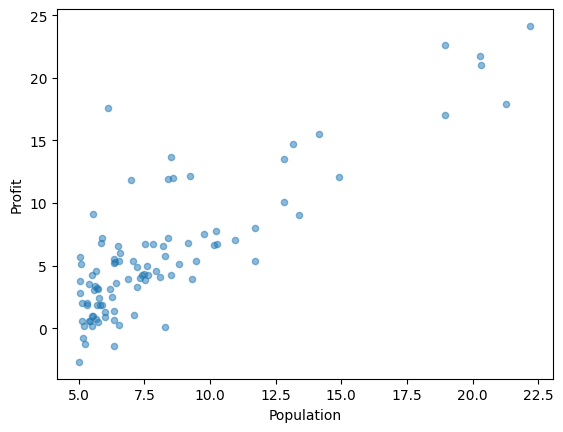

In [1662]:
df.plot.scatter(x="Population",
                         y="Profit",
                         alpha=0.5);

Реализация функции минимизации


In [1663]:
def computeCost(X, y, theta):
    e = np.dot(X,theta).reshape(len(y),-1)-y
    return np.dot((e).T,e)/(2*m)


def gradientDescent(X, y, theta, alpha, iters):

    m = np.size(y, axis=0)
    J_history = []
    Theta = []
    theta = theta.copy()

    for iter in range(iters):
        h_theta = np.dot(X, theta)
        theta = theta - (alpha / m) * (X.T).dot(h_theta - y)

        Theta.append(theta)
        J_history.append(computeCost(X, y, theta)[0])


    return theta, J_history



In [1664]:
X = np.array(df['Population'])
m = int(df.size/2)
ones = np.ones(X.size)
X=np.stack((ones, X)).T
Y=np.array(df['Profit']).reshape(m,1)
Theta=np.array([[0],[0]])
a = 0.01
iters = 1000

In [1665]:
s = computeCost(X,Y,Theta)
s

array([[32.07273388]])

In [1666]:
Theta=np.array([[0],[0]])
theta, J_history = gradientDescent(X, Y, Theta, a, iters)

theta[-1]


array([1.1272942])

График изменения функции потерь в процессе обучения

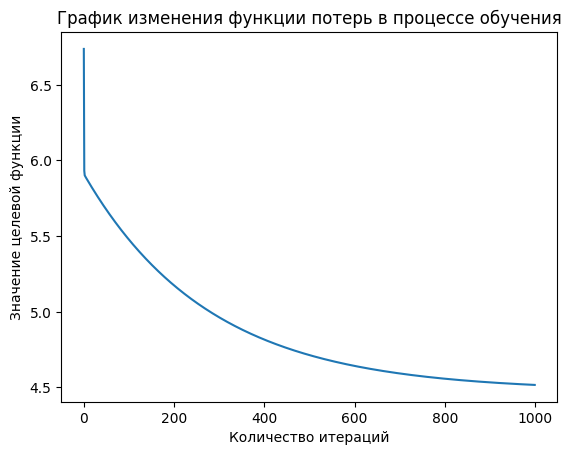

In [1667]:
plt.plot(J_history)
plt.xlabel('Количество итераций')
plt.ylabel('Значение целевой функции')
plt.title('График изменения функции потерь в процессе обучения')
plt.show()

Построение графика


In [1668]:
x = df["Population"].to_numpy()
x = list(x)
Y = df["Profit"].to_numpy()
Y = list(x)

Алгоритм sklearn

0.7020315537841397
[1.19303364]
[8.03455556]


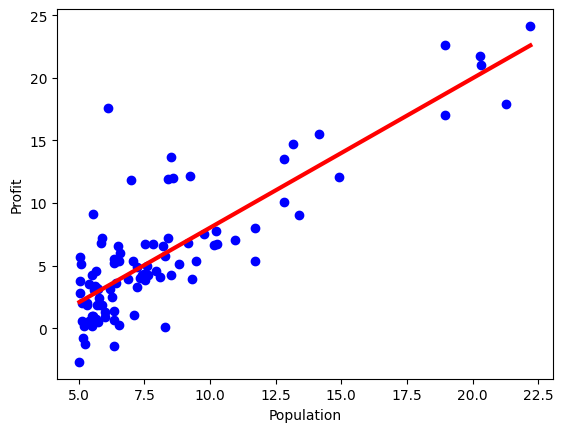

In [1669]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

dff = pd.read_table("/content/ex1data1.txt", header = None, delimiter= ",",names=["Population", "Profit"])

data_sk = np.array(dff)

X_sk = data_sk[:,:1]
y_sk = data_sk[:,1]
reg_sk = LinearRegression().fit(X_sk, y_sk)
print(reg_sk.score(X_sk, y_sk))
print(reg_sk.coef_)
print(reg_sk.predict(np.array([[10.]])))


x_range = np.linspace(X_sk.min(), X_sk.max(), 100).reshape(-1, 1)


y_pred = reg_sk.predict(x_range)


plt.scatter(X_sk, y_sk, color='blue')
plt.plot(x_range, y_pred, color='red', linewidth=3)
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

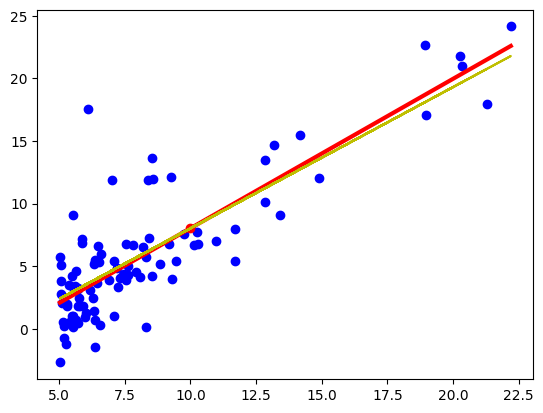

In [1670]:
plt.scatter(df['Population'], df['Profit'], color = 'b');
target = df.Profit
y = theta[0] + theta[1] * x

plt.scatter([10.], [theta[0] + theta[1] * 10.], color = 'r');
plt.plot(x_range, y_pred, color='red', linewidth=3);
plt.plot(x, y, color = 'y');




Добавить график реализации склерн

In [1671]:
def gradientDescentIter(X, y, theta, alpha, iters):

    m = np.size(y, axis=0)
    J_history = []
    theta_hist = []
    theta = theta.copy()
    it = []
    for iter in range(iters):
        h_theta = np.dot(X, theta)
        theta = theta - (alpha / m) * (X.T).dot(h_theta - y)

        theta_hist.append(theta)
        J_history.append(computeCost(X, y, theta))
        it.append(iter)
    return J_history, it

In [1672]:
X = np.array(df['Population'])
m = int(df.size/2)
ones = np.ones(X.size)
X=np.stack((ones, X)).T
Y=np.array(df['Profit']).reshape(m,1)
Theta=np.array([[0],[0]])
a = 0.01
iters = 1000



In [1673]:
Theta=np.array([[0],[0]])
d = gradientDescentIter(X, Y, Theta, a, iters)

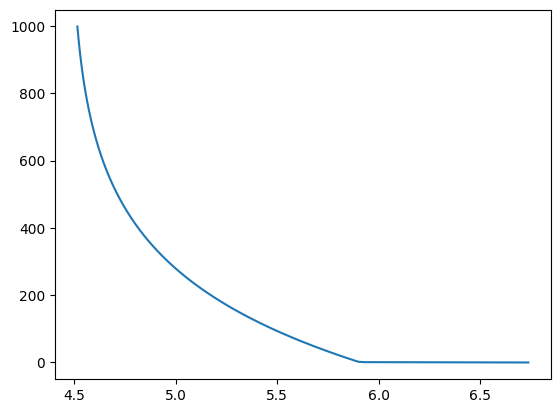

In [1674]:
x, y = [], []
for i in range(len(d[0])):
  x.append(d[0][i][0])
  y.append(d[1][i])
plt.plot(x, y);

In [1675]:
X = np.array(df['Population'])
m = int(df.size/2)
ones = np.ones(X.size)
X=np.stack((ones, X)).T
Y=np.array(df['Profit']).reshape(m,1)
Theta=np.array([[0],[0]])
a = 0.05
iters = 1000
Theta=np.array([[0],[0]])
d = gradientDescentIter(X, Y, Theta, a, iters)

<ipython-input-1671-7bf06653f2a7>:10: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (alpha / m) * (X.T).dot(h_theta - y)


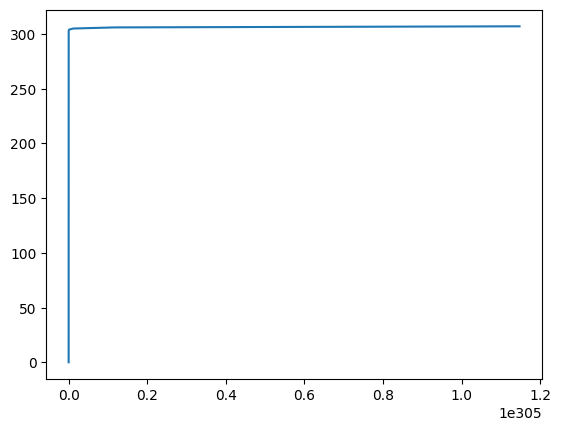

In [1676]:
x, y = [], []
for i in range(len(d[0])):
  x.append(d[0][i][0])
  y.append(d[1][i])
plt.plot(x, y);

In [1677]:
X = np.array(df['Population'])
m = int(df.size/2)
ones = np.ones(X.size)
X=np.stack((ones, X)).T
Y=np.array(df['Profit']).reshape(m,1)
Theta=np.array([[0],[0]])
a = 0.001
iters = 1000
Theta=np.array([[0],[0]])
d = gradientDescentIter(X, Y, Theta, a, iters)

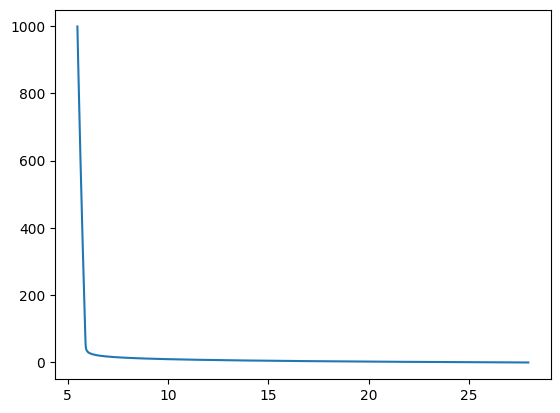

In [1678]:
x, y = [], []
for i in range(len(d[0])):
  x.append(d[0][i][0])
  y.append(d[1][i])
plt.plot(x, y);

Предсказание на реальных данных

Предсказание выгоды от открытия ресторана в городе с населением 10 млн

In [1679]:
theta[-1]
print(theta[0] + theta[1] * 10.)

[8.03153988]


Вычисление точности модели





In [1680]:
x = df["Population"].to_numpy()
x = list(x)
Y = df["Profit"].to_numpy()
Y = list(x)

Y_pred = theta[0] + theta[1] * x
SSres = np.sum((Y - Y_pred) ** 2)
SStot = np.sum((Y - np.mean(Y)) ** 2)
r2 = 1 - (SSres / SStot)
print(f'R2: {r2}')

R2: 0.6564418169347359


# Задание 3.1

In [1681]:
df = pd.read_table("/content/ex1data1.txt", header = None, delimiter= ",",names=["Population", "Profit"])

data = np.array(df)
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [1682]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

df = pd.read_table("/content/ex1data1.txt", header = None, delimiter= ",",names=["Population", "Profit"])

data = np.array(df)

X = data[:,:1]
y = data[:,1]
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.predict(np.array([[10.]])))



0.7020315537841397
[1.19303364]
[8.03455556]


# Задание 2
## Множественная линейная регрессия

In [1683]:
df = pd.read_table("/content/ex1data2.txt", header = None, delimiter= ",",names=["Size", "Bedrooms", "Price"])
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Данные для графиков

In [1684]:
data = np.array(df)
xx = data[:,0]
YY = data[:,2]

График

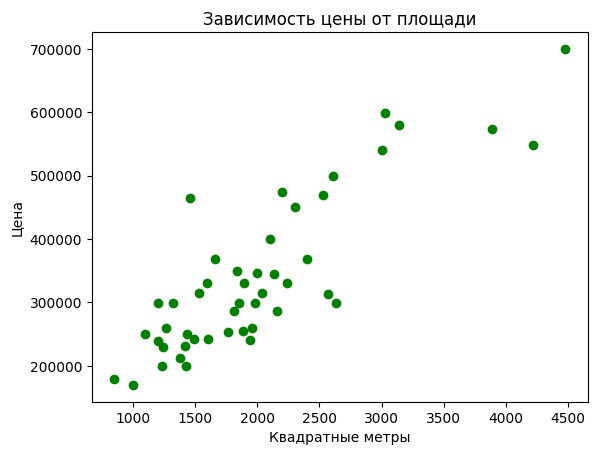

In [1685]:
plt.scatter(xx, YY, color='g')
plt.xlabel('Квадратные метры')
plt.ylabel('Цена')
plt.title('Зависимость цены от площади')
plt.show()

Нормализация

In [1686]:
import math
df = (df-df.mean ())/df.std()
#df

def normalization (data):
  return (data - np.mean(data))/math.sqrt((np.sum((data - np.mean(data))**2))/len(data-1))

In [1687]:
def computeCost(X, y, theta):

      m = len(y)
      predictions = X.dot(theta)
      sqr_errors = (predictions - y) ** 2
      J = 1 / (2 * m) * np.sum(sqr_errors)
      return J

def gradientDescent(X, y, theta, alpha, iters):
    m = np.size(y, axis=0)
    J_history = []
    Theta = []
    theta = theta.copy()

    for iter in range(iters):
        h_theta = np.dot(X, theta)
        theta = theta - (alpha / m) * (X.T).dot(h_theta - y)
      #  print(theta)
        Theta.append(theta)
        J_history.append(computeCost(X, y, theta))
        #print(computeCost(X, y, theta))

    return theta, J_history

r = np.array(df)
X_0 = normalization(data[:,0])
X_1 = normalization(data[:,1])

#m = int(df.size/3)
ones = np.ones(X.size)
X=np.vstack((np.ones_like(X_1), X_0.T,X_1.T)).T
Y=normalization(data[:,2])
Theta=np.array([0,0,0])

# Шаг обучения
a = 0.05
# Количество итераций
iters = 1000

In [1688]:
theta, J_history = gradientDescent(X, Y, Theta, a, iters)
print(f'Новые значения тета {theta}')

Новые значения тета [-7.49695814e-17  8.84765988e-01 -5.31788196e-02]


График обучения сети методом градиентного спуска

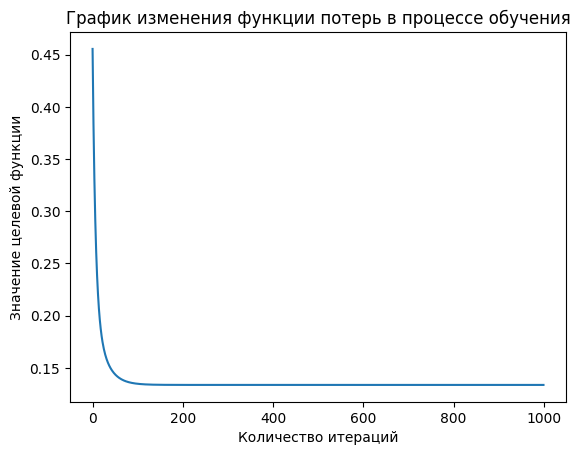

In [1689]:
plt.plot(J_history)
plt.xlabel('Количество итераций')
plt.ylabel('Значение целевой функции')
plt.title('График изменения функции потерь в процессе обучения')
plt.show()

In [1690]:
s = computeCost(X,Y,theta)
print(f'Целевая функция {s}')

Целевая функция 0.13352749098554287


Нормализация полученного значения

In [1691]:
size = 3000.
bedrooms = 4.

predict = theta[0] + theta[1]*size + theta[2]*bedrooms
cc = xx[:]
cc = np.append(cc, np.array(predict))
cc = normalization(cc)
cc[-1]

0.8165324450009079

Новые значения параметров theta: [-7.49695814e-17  8.84765988e-01 -5.31788196e-02]
Последнее значение целевой функции: 0.13
Предсказанное значение 441419.7937523805


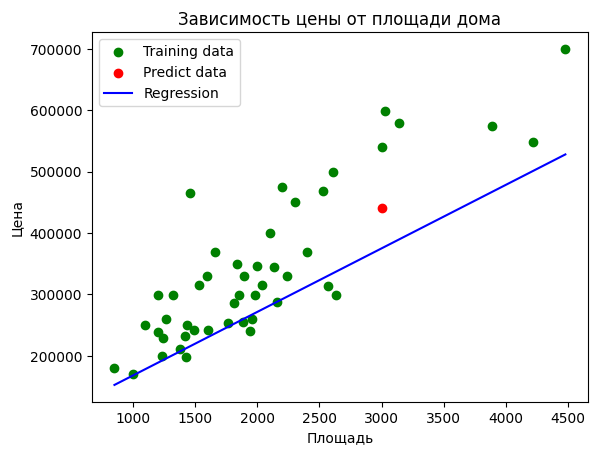

In [1692]:
import math

def gradientDescent(X, y, theta, alpha, iters):

    m = np.size(y, axis=0)
    J_history = []
    Theta = []
    theta = theta.copy()

    for iter in range(iters):
        h_theta = np.dot(X, theta)
        theta = theta - (alpha / m) * (X.T).dot(h_theta - y)

        Theta.append(theta)
        a = computeCost(X, y, theta)
        J_history.append(computeCost(X, y, theta))
        #print(computeCost(X, y, theta))

    return Theta, a #J_history

# Выполняем градиентный спуск
theta, J_history = gradientDescent(X, Y, Theta, a, iters)

# Выводим новые значения параметров и последнее значение целевой функции
print("Новые значения параметров theta:", theta[-1])
print(f"Последнее значение целевой функции: {round(J_history,2)}")

# Визуализируем данные
size = 3000.
bedrooms = 4.


prediction_original = (cc[-1] * np.std(YY)) + np.mean(YY)

print(f'Предсказанное значение {prediction_original}')
plt.scatter(xx, np.array(YY),  color='g', label='Training data')
plt.scatter(size,  prediction_original,  color='r', label='Predict data')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.title('Зависимость цены от площади дома')

# Построение линии регрессии
x_values = np.linspace(min(xx), max(xx), 100)
n_x_values = normalization(np.array(x_values))

# Вычисляем соответствующие значения y для линии регрессии (без учета второго параметра - количество комнат)
y_val = theta[-1][0] + theta[-1][1] * n_x_values
y_values = (y_val * np.std(YY)) + np.mean(YY)

# Наложение линии регрессии на график
plt.plot(x_values, y_values, color='b',label='Regression')

plt.legend()
plt.show()

Предсказанное значение

In [1693]:
# Обратная нормализация предсказания
prediction_original = (cc[-1] * np.std(YY)) + np.mean(YY)
prediction_original

441419.7937523805

Вычисление точности модели

In [1694]:
predictions = theta[-1][0] + theta[-1][1] * normalization(np.array(xx))
errors = predictions - Y
sse = np.sum(errors ** 2)
r2 = 1 - sse / (Y.size * Y.var())
print("R-squared:", r2)

R-squared: 0.7301170311742189


# Задание 3.2


In [1695]:
df = pd.read_table("/content/ex1data2.txt", header = None, delimiter= ",", names=["Size", "Bedrooms", "Price"])

data = np.array(df)
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


предсказания цены на дом площадью 3000 футов и числом комнат 4

In [1696]:
data = np.array(df)

X = data[:, :2]
y = data[:, 2]

reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)
print(reg.predict(np.array([[3000, 4]])))



0.7329450180289142
[  139.21067402 -8738.01911233]
89597.90954279754
[472277.85514636]


In [1697]:
df = pd.read_table("/content/ex1data2.txt", header = None, delimiter= ",", names=["Size", "Bedrooms", "Price"])

data = np.array(df)
df.head()

features = ["Size", "Bedrooms"]
target = "Price"

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

print(model.coef_)

print(model.intercept_)
print(model.score(X, y))
x_pred = np.array([3000, 4])
x_pred = x_pred.reshape(-1, len(features))
print(model.predict(x_pred))

[  139.21067402 -8738.01911233]
89597.90954279754
0.7329450180289142
[472277.85514636]
